In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanicTrain = pd.read_csv('titanic_train.csv')

In [3]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


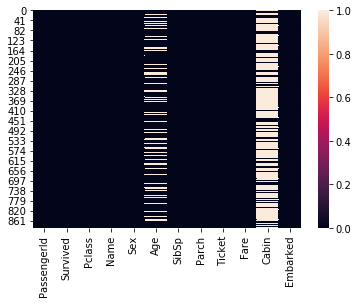

In [4]:
sns.heatmap(titanicTrain.isnull())

In [5]:
sns.set_style('whitegrid')

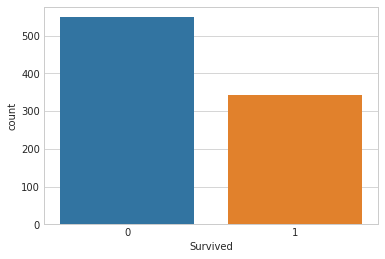

In [6]:
sns.countplot(x = 'Survived', data =  titanicTrain)

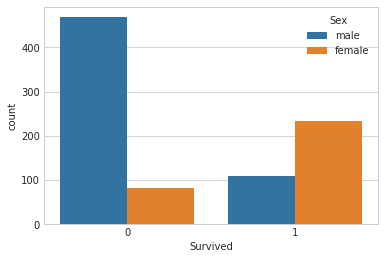

In [7]:
sns.countplot(x = 'Survived', data = titanicTrain, hue = 'Sex')

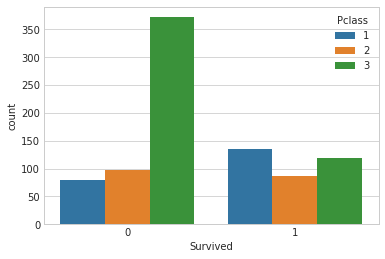

In [8]:
sns.countplot(x = 'Survived', data = titanicTrain, hue = 'Pclass')

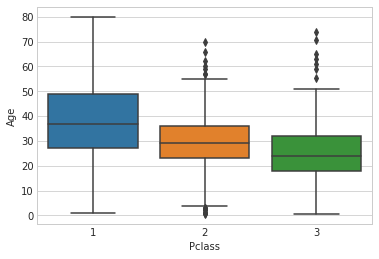

In [9]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanicTrain)

In [10]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
titanicTrain['Age'] = titanicTrain[['Age','Pclass']].apply(imputeAge, axis = 1)

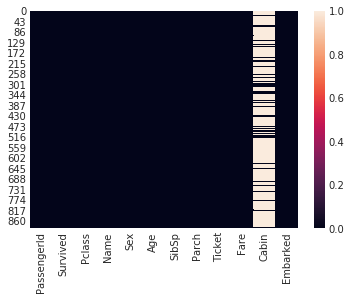

In [12]:
sns.heatmap(titanicTrain.isnull())

In [13]:
titanicTrain.drop('Cabin', axis = 1, inplace = True)

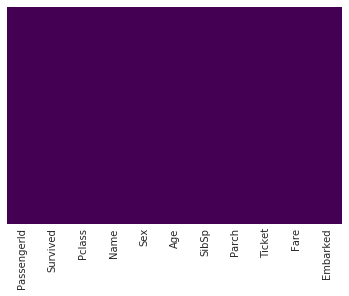

In [14]:
sns.heatmap(titanicTrain.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [15]:
titanicTrain.dropna(inplace = True)

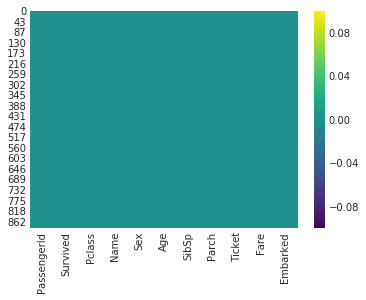

In [16]:
sns.heatmap(titanicTrain.isnull(), cmap = 'viridis')

In [17]:
titanicTest = pd.read_csv('titanic_test.csv')

In [18]:
titanicTest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [19]:
titanicTrain.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [20]:
def DummiesOfSexEmbarked(titanicTrain):
    sex = pd.get_dummies(titanicTrain['Sex'], drop_first = True)
    embark = pd.get_dummies(titanicTrain['Embarked'], drop_first = True)
    titanicTrain.drop(['Sex','Embarked'], axis = 1, inplace = True)
    titanicTrain = pd.concat([titanicTrain, sex, embark], axis = 1)
    return titanicTrain

In [21]:
titanicTrain = DummiesOfSexEmbarked(titanicTrain)

In [22]:
titanicTrain.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [23]:
titanicTrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
titanicTest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


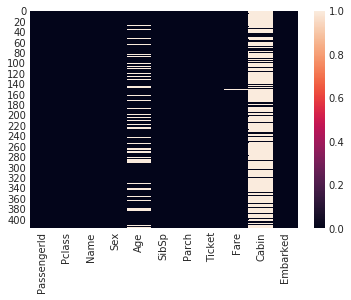

In [25]:
sns.heatmap(titanicTest.isnull())

In [26]:
titanicTest['Age'] = titanicTest[['Age','Pclass']].apply(imputeAge, axis = 1)

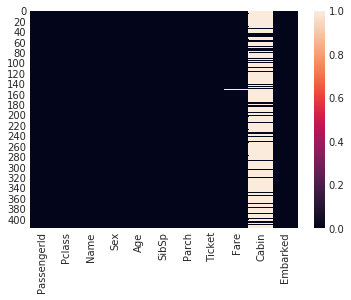

In [27]:
sns.heatmap(titanicTest.isnull())

In [28]:
titanicTest.drop(['Cabin'], axis = 1, inplace = True)

In [29]:
titanicTest.dropna(inplace = True)

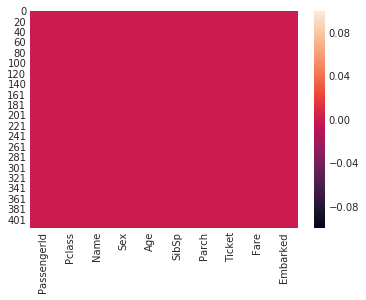

In [30]:
sns.heatmap(titanicTest.isnull())

## TEST DATASET ON KAGGLE IS NOT LABELED BECAUSE WE HAVE TO LABEL IT AND THEN SUBMIT, SO LET'S MOVE FURTHER BY SPLITTING THE TRAINNING DATASET INTO TRAIN AND TEST

In [31]:
Y = titanicTrain['Survived']
X = titanicTrain.drop(['Survived'], axis = 1)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logistic = LogisticRegression()

In [36]:
logistic.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logistic.predict(testX)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(testY, predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



## NOW LET'S TRAIN THE MODEL ON FULL TRAINNIG DATASET AND PREDICT THE LABELS

In [40]:
yTrain = titanicTrain['Survived']

In [41]:
xTrain = titanicTrain.drop(['Survived'], axis = 1)

In [42]:
logistic.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
titanicTest.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [44]:
titanicTest = DummiesOfSexEmbarked(titanicTest)

In [45]:
titanicTest.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


In [46]:
titanicTest = titanicTest.drop(['Name', 'Ticket'], axis = 1)

In [47]:
titanicTest.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1


In [48]:
Survived = logistic.predict(titanicTest)

In [49]:
Survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [50]:
titanicTest['Survived'] = pd.Series(Survived)

In [51]:
titanicTest.head(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0.0
1,893,3,47.0,1,0,7.0000,0,0,1,0.0
2,894,2,62.0,0,0,9.6875,1,1,0,0.0
3,895,3,27.0,0,0,8.6625,1,0,1,0.0
4,896,3,22.0,1,1,12.2875,0,0,1,1.0
5,897,3,14.0,0,0,9.2250,1,0,1,0.0
6,898,3,30.0,0,0,7.6292,0,1,0,1.0
7,899,2,26.0,1,1,29.0000,1,0,1,0.0
8,900,3,18.0,0,0,7.2292,0,0,0,1.0
9,901,3,21.0,2,0,24.1500,1,0,1,0.0
